<a href="https://colab.research.google.com/github/namratesh/Machine-Learning/blob/master/2_Tensorflow_Loss_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing libraries
import numpy as np
%tensorflow_version 1.x
import tensorflow as tf
import matplotlib.pyplot as plt

sess = tf.Session()


# Loss Function for Regression

In [0]:
#To start, we will create 500 x-values between -1 to 1.
x_vals = tf.linspace(-1., 1., 500)
target = tf.constant(0.)

**L2 Norm Loss** - It is also knows as the Euclidean loss function. It is just a **square of target Distance**.


* great loss beacuse it is very curved near the target
*  can use to converge to the target more slowly, the closer




In [0]:
l2_y_vals = tf.square(target-x_vals)
l2_y_out = sess.run(l2_y_vals)

#tensorflow has built on L2-norm nn.l2_loss()

**L1 norm Loss** - It is also knoows as the absolute loss function. Instead of squaring the difference , we take the absolute value.


*  better than L2 norm for outliers beacuse it is not steep for larger values
*  L1 norm is not smooth at the target and this can result in algorithms not converging well.



In [0]:
l1_y_vals = tf.abs(target-x_vals)
l1_y_out = sess.run(l1_y_vals)


**Pseudo-Huber loss** - It is continous and smooth approximation to the huber loss function.

* It take the best of the L1 and L2 norms by being convex near the targey and less steep for extreme values.
* from depends on extra parametr of **Delta** how steep it will be.

Here we will take two delta D1 =0.5 and D2 = 5.5  to see the difference

In [0]:
delta1 = tf.constant(0.5)
phuber_y_vals = tf.multiply(tf.square(delta1), tf.sqrt(1. + tf.square((target - x_vals)/delta1)) -1.)
phuber1_y_out = sess.run(phuber_y_vals)

delta2 = tf.constant(5.5)
phuber2_y_vals = tf.multiply(tf.square(delta2), tf.sqrt(1. + tf.square((target - x_vals)/delta2)) -1.)
phuber2_y_out = sess.run(phuber2_y_vals)

Regression Plot

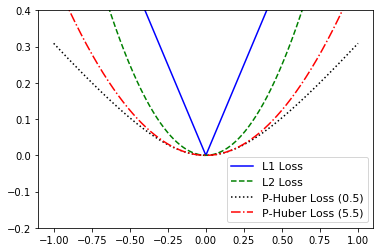

In [62]:
x_array = sess.run(x_vals)
plt.plot(x_array, l1_y_out, 'b-', label='L1 Loss')
plt.plot(x_array, l2_y_out, 'g--', label='L2 Loss')
plt.plot(x_array, phuber1_y_out, 'k:', label='P-Huber Loss (0.5)')
plt.plot(x_array, phuber2_y_out, 'r-.', label='P-Huber Loss (5.5)')
plt.ylim(-0.2, 0.4)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

# Loss function for Classification 

It is used to evaluate loss when predictng categorical outcomes

In [0]:
#defining function
x_vals = tf.linspace(-3., 5., 500)
target = tf.constant(1.)
targets = tf.fill([500,], 1.)

**Hinge Loss** mostly used in Support vecor machine but it can be used in neural network as well.

* it is meant to compute a loss between with two targets

In [0]:
hinge_y_vals = tf.maximum(0., 1.- tf.multiply(target, x_vals))
hinge_y_out = sess.run(hinge_y_vals)

**CrossEntropy** - It is for binary  case. Sometimes refer as the logistic loss function.

* we wish to use distance form actual class to predicted class
* To measure disrance we use cross entropy formula form information theory

In [0]:
entropy_y_val = -tf.multiply(target, tf.log(x_vals)) - tf.multiply((1.-target), tf.log(1.- x_vals))
entropy_y_out = sess.run(entropy_y_val)

**Sigmoid cross entropy loss** - It is similar to Cross entropy except we transform x_vals by the sigmoid function before put them in the cross entropy

In [81]:
sigEntropy_y_vals = tf.nn.sigmoid_cross_entropy_with_logits(labels = x_vals, logits = targets)
sigEntropy_y_out = sess.run(sigEntropy_y_vals)  

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


**Weighted Cross Entropy**  - It is weighted version of sigmoid cross  entropy. we provide weight on positive target

In [0]:
weight = tf.constant(0.5)
weightEntropy_y_vals = tf.nn.weighted_cross_entropy_with_logits(labels= x_vals, logits  = targets , pos_weight = weight, )
weightEntropy_y_out = sess.run(weightEntropy_y_vals)

**Softmax Cross Entropy Loss**  - It operates on normalized outputs.

* It is used where we have only one target category instead of multiple beacuse this  function transforms the output into a probabiltiy distribution vai the softmax function and then computes the loss function from true probability distribution

In [85]:
unscaled_logits = tf.constant([[1., -3., 10.]])
target_dist = tf.constant([[0.1, 0.02, 0.88]])
softmax_xentropy = tf.nn.softmax_cross_entropy_with_logits(labels = unscaled_logits, logits =  target_dist)
print(sess.run(softmax_xentropy))

[3.2568445]


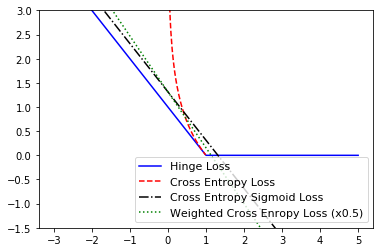

In [86]:
x_array = sess.run(x_vals)
plt.plot(x_array, hinge_y_out, 'b-', label='Hinge Loss')
plt.plot(x_array, entropy_y_out, 'r--', label='Cross Entropy Loss')
plt.plot(x_array, sigEntropy_y_out, 'k-.', label='Cross Entropy Sigmoid Loss')
plt.plot(x_array, weightEntropy_y_out, 'g:', label='Weighted Cross Enropy Loss (x0.5)')
plt.ylim(-1.5, 3)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

![alt text](https://![image.png](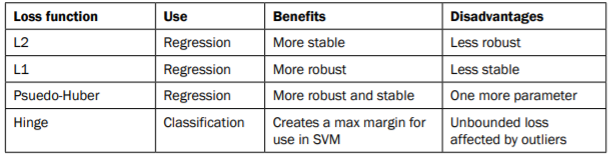))

![alt text](https://![image.png](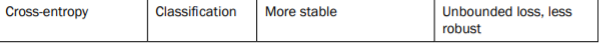))